In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.shape

(150, 5)

In [37]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [38]:
df['species'] = df['species'].map({'Iris-setosa':1, 'Iris-virginica':2, 'Iris-versicolor':3})
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [39]:


# target = type of flower => iris_setosa, iris_virginica, iris_versicolor
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [40]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [41]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

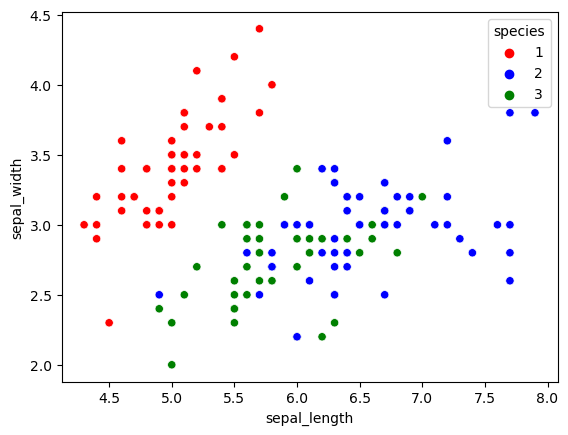

In [42]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species',palette=['red','blue','green'])
plt.show()

In [43]:
df['species'].value_counts()

1    50
3    50
2    50
Name: species, dtype: int64

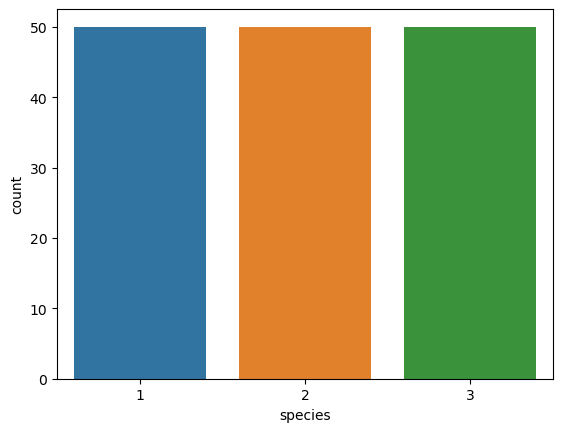

In [44]:
sns.countplot(x=df['species'])
plt.show()

In [45]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

#### Select x and y

In [46]:
x = df.drop('species',axis=1)
y = df['species']
print(x.shape)
print(y.shape)

(147, 4)
(147,)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
def eval_model(ytest,ypred):
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [52]:
rf1 = RandomForestClassifier(n_estimators=20,random_state=0,criterion='entropy',max_depth=3,
                            min_samples_split=25)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=25,
                       n_estimators=20, random_state=0)

In [53]:
print('Train Sc',rf1.score(x_train,y_train))  # train acc
print('Test Sc',rf1.score(x_test,y_test))   # test acc

Train Sc 0.9509803921568627
Test Sc 0.9777777777777777


In [54]:
num_trees = list(range(15,50,5))   # 7
crit = ['gini','entropy']          # 2
# print(len(num_trees))       
md  = [2,3,4]              # 3
mss = [8,10,12,15,17,20] # 6
# print(2*7*6*3)

In [55]:
scr = []
ijk_list = []
for i in num_trees:
    for j in crit:
        for k in md:
            model = RandomForestClassifier(n_estimators=i,criterion=j,max_depth=k)
            model.fit(x_train,y_train)
            scr.append([model.score(x_train,y_train),model.score(x_test,y_test)])
            ijk_list.append((i,j,k))
#             print(f'At n_estimators = {i},crit={j},max_depth={k},min_samples_split={l}=>\n
#             Tr_Sc {model.score(x_train,y_train)}, Te_Sc {model.score(x_test,y_test)}')


In [56]:
print(ijk_list)
print(scr)

[(15, 'gini', 2), (15, 'gini', 3), (15, 'gini', 4), (15, 'entropy', 2), (15, 'entropy', 3), (15, 'entropy', 4), (20, 'gini', 2), (20, 'gini', 3), (20, 'gini', 4), (20, 'entropy', 2), (20, 'entropy', 3), (20, 'entropy', 4), (25, 'gini', 2), (25, 'gini', 3), (25, 'gini', 4), (25, 'entropy', 2), (25, 'entropy', 3), (25, 'entropy', 4), (30, 'gini', 2), (30, 'gini', 3), (30, 'gini', 4), (30, 'entropy', 2), (30, 'entropy', 3), (30, 'entropy', 4), (35, 'gini', 2), (35, 'gini', 3), (35, 'gini', 4), (35, 'entropy', 2), (35, 'entropy', 3), (35, 'entropy', 4), (40, 'gini', 2), (40, 'gini', 3), (40, 'gini', 4), (40, 'entropy', 2), (40, 'entropy', 3), (40, 'entropy', 4), (45, 'gini', 2), (45, 'gini', 3), (45, 'gini', 4), (45, 'entropy', 2), (45, 'entropy', 3), (45, 'entropy', 4)]
[[0.9509803921568627, 0.9555555555555556], [0.9705882352941176, 0.9555555555555556], [0.9901960784313726, 0.9555555555555556], [0.9607843137254902, 0.9555555555555556], [0.9901960784313726, 0.9333333333333333], [0.99019607

In [57]:
r = [[2,3],[5,7],[10,9],[12,17],[20,15]]
r1_max = [r[i][1] for i in range(len(r))]  # 17
print(r1_max)
idx_max  = r1_max.index(max(r1_max))
print(idx_max)

[3, 7, 9, 17, 15]
3


In [58]:
test_sc_max =  [scr[i][1] for i in range(len(scr))]
idx_test_sc_max = test_sc_max.index(max(test_sc_max))
print(idx_test_sc_max)

print(ijk_list[idx_test_sc_max])

21
(30, 'entropy', 2)


In [88]:
## Trees Index - 0 to 19

In [60]:
fn

NameError: name 'fn' is not defined

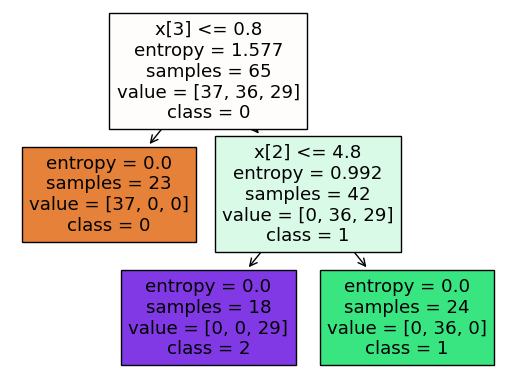

In [62]:
cn = ['0','1','2']
plot_tree(rf1.estimators_[0],class_names=cn, filled=True)
plt.show()

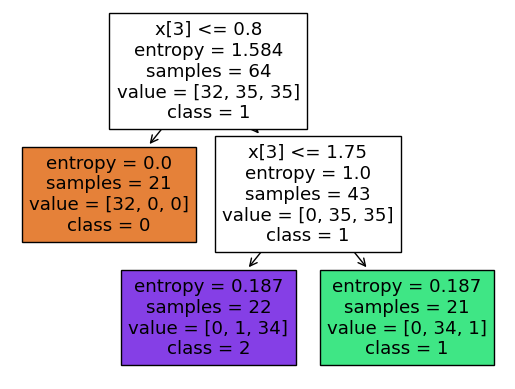

In [64]:
plot_tree(rf1.estimators_[1],class_names=cn, filled=True)
plt.show()

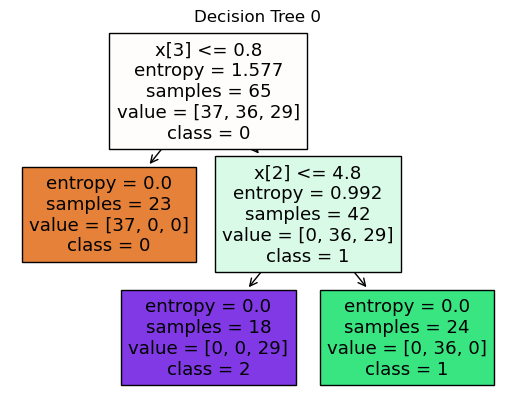

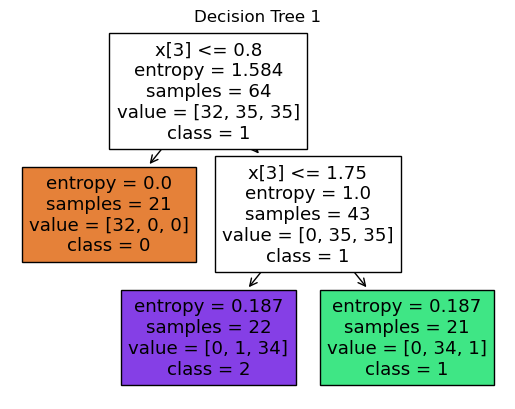

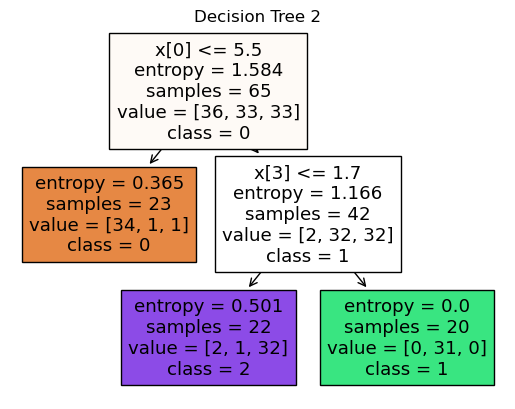

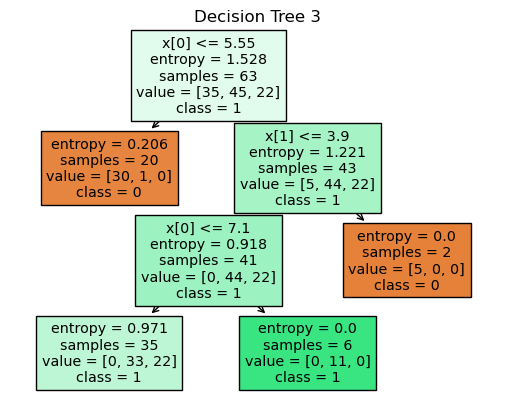

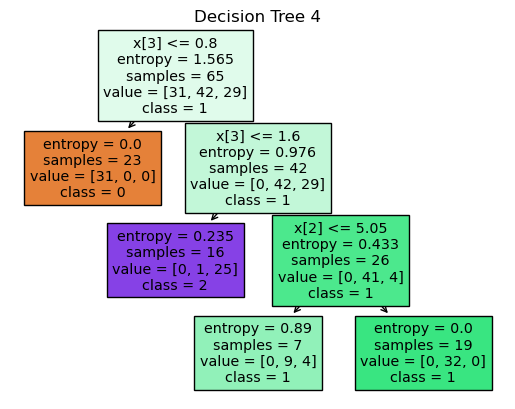

In [65]:
for i in range(5):
    plot_tree(rf1.estimators_[i],class_names=cn, filled=True)
    plt.title(f'Decision Tree {i}')
    plt.show()